In [1]:
#Question 1
#Name: Nagaveti Bhavani Santhoshi Achyutha
#CWID: A20314248

#**Question 1**

---


#**Name:** Nagaveti Bhavani Santhoshi Achyutha
#**CWID:** A20314248

In [ ]:
import numpy as np
from pandas import DataFrame
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt  # To visualize

In [2]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [3]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

In [4]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [5]:
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [6]:
# Calculate coefficients
def coefficients(x_train,y_train):
	x = [row[0] for row in x_train]
	y = [row for row in y_train]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

In [7]:
#  linear regression algorithm
def linear_regression(x_test,x_train, y_train):
	predictions = list()
	b0, b1 = coefficients(x_train,y_train)
	for row in x_test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions

In [8]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm():
  predicted = linear_regression(x_test,x_train, y_train)
  actual = [row[0] for row in y_test]
  rmse = rmse_metric(actual, predicted)
  xt = [row[0] for row in x_test]
  plt.scatter(xt, actual)
  plt.plot(xt, predicted, color='red')
  plt.show()
  return rmse


In [10]:
x_test= np.load('x_test.npy')
x_train= np.load('x_train.npy')
y_test= np.load('y_test.npy')
y_train= np.load('y_train.npy')

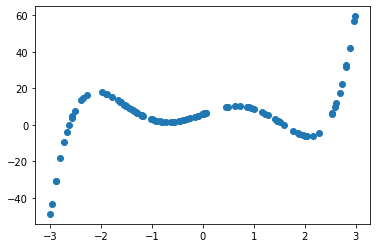

In [11]:
#Plot train data realtionship
plt.scatter(x_train, y_train)
plt.show()

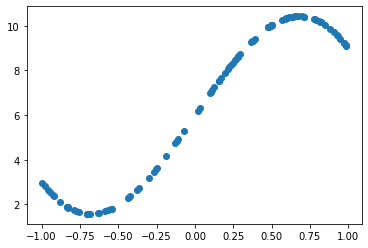

In [12]:
#Plot test data realtionship
plt.scatter(x_test, y_test)
plt.show()

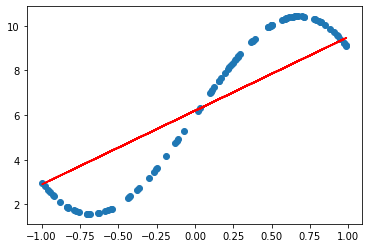

RMSE: 1.679


In [13]:
seed(1)
rmse = evaluate_algorithm()
print('RMSE: %.3f' % (rmse))

#in graph red line is predicted and show function is linear
#Relationship is linear

# Non linearity (polynomial basis )

In [14]:
X = DataFrame(x_train,columns=['X'])
X_test = DataFrame(x_test,columns=['X'])

In [15]:
X['X1'] = x_train**2
X['X2'] = x_train**3

In [16]:
X_test['X1'] = x_train**2
X_test['X2'] = x_train**3

In [17]:
m = len(X)
X = X/X.max()

In [18]:
X_test = X_test/X_test.max()

In [19]:
def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

In [20]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)

In [21]:

def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta

In [22]:
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y_train, theta, 0.05, 700)

In [23]:
y_hat = hypothesis(X_test, theta)

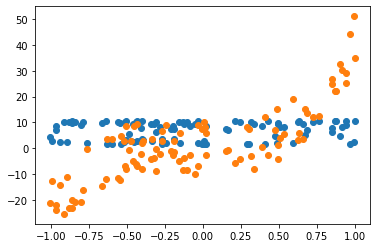

In [24]:

plt.figure()
plt.scatter(x=X['X'],y= y_test)           
plt.scatter(x=X['X'], y=y_hat)
plt.show()